In [69]:
from PIL import Image, ImageDraw,ImageFont
import qrcode



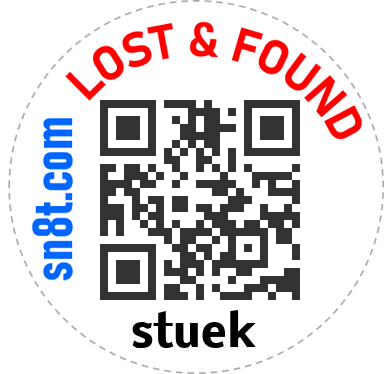

In [162]:

def createQRCode(text,box_size=2):
    qr = qrcode.QRCode(
        version=1,
        error_correction=qrcode.constants.ERROR_CORRECT_L,
        box_size=box_size,
        border=0,
    )
    qr.add_data(text)
    qr.make(fit=True)

    img = qr.make_image(fill_color="#333333", back_color="white")
    return img


FONT_NBOLD = '/home/jovyan/fonts/Nobile-Bold.ttf' 
FONT_NREGULAR = '/home/jovyan/fonts/Nobile-Regular.ttf' 
# FONT_NREGULAR = os.path.join(os.path.dirname(__file__)+'/..','fonts/truetype/Nobile/Nobile-Regular.ttf') 


def getTextImg(text,font=FONT_NBOLD,font_size=20,rotate=0,fill="blue"):
    font = ImageFont.truetype(font, font_size)
    a,b = font.getsize(text)
    text_size = a+2,b+2
    timg =  Image.new('RGB', text_size, "white")
    odraw = ImageDraw.Draw(timg)
    odraw.text((1, 1), text, font=font,fill=fill)
    if rotate:
        angle = {1:90,2:180,3:270}.get(rotate,0)
        size = (text_size[1],text_size[0]) if rotate in [1,3] else text_size
        timg = timg.rotate( angle, expand=1 ).resize(size)

    return timg

def getBaseCircle():
    circle = Image.new("RGB",(96,96),'white')
    dr = ImageDraw.Draw(circle)
    dr.ellipse((0,0,96,96),fill='gray')

    odraw = ImageDraw.Draw(circle)
    
    font = FONT_NBOLD
    font_size = 11
    
    _font = ImageFont.truetype(font, font_size)
    odraw.text((10, 20), 'Lost & Found',fill='red',font=_font)
    
    rImg = getTextImg('sn8t.com',rotate=1,font_size=8,font=FONT_NREGULAR)
    circle.paste(rImg,(10,20))
    return circle
    
def getCircleWithCode(code):
    text  = f'https://sn8t.com/q/{code}'
    qrimg = createQRCode(text,8)
    circle = getBaseBackground()
    circle.paste(qrimg,(100,100))   
    codeImage = getTextImg(code,rotate=0,font_size=42,font=FONT_NBOLD,fill='black')
    circle.paste(codeImage,(130,310))
    return circle
    
def getBaseBackground():
    INCH = 96*4
    base_img= Image.open('/home/jovyan/fonts/sn8t-sticker.png')
    base_img.thumbnail((INCH,INCH), Image.ANTIALIAS)
    return base_img
    
# BASE_CIRCLE = getBaseCircle()
# BASE_CIRCLE = getBaseBackground()



qrimg = getCircleWithCode('stuek')
display(qrimg)

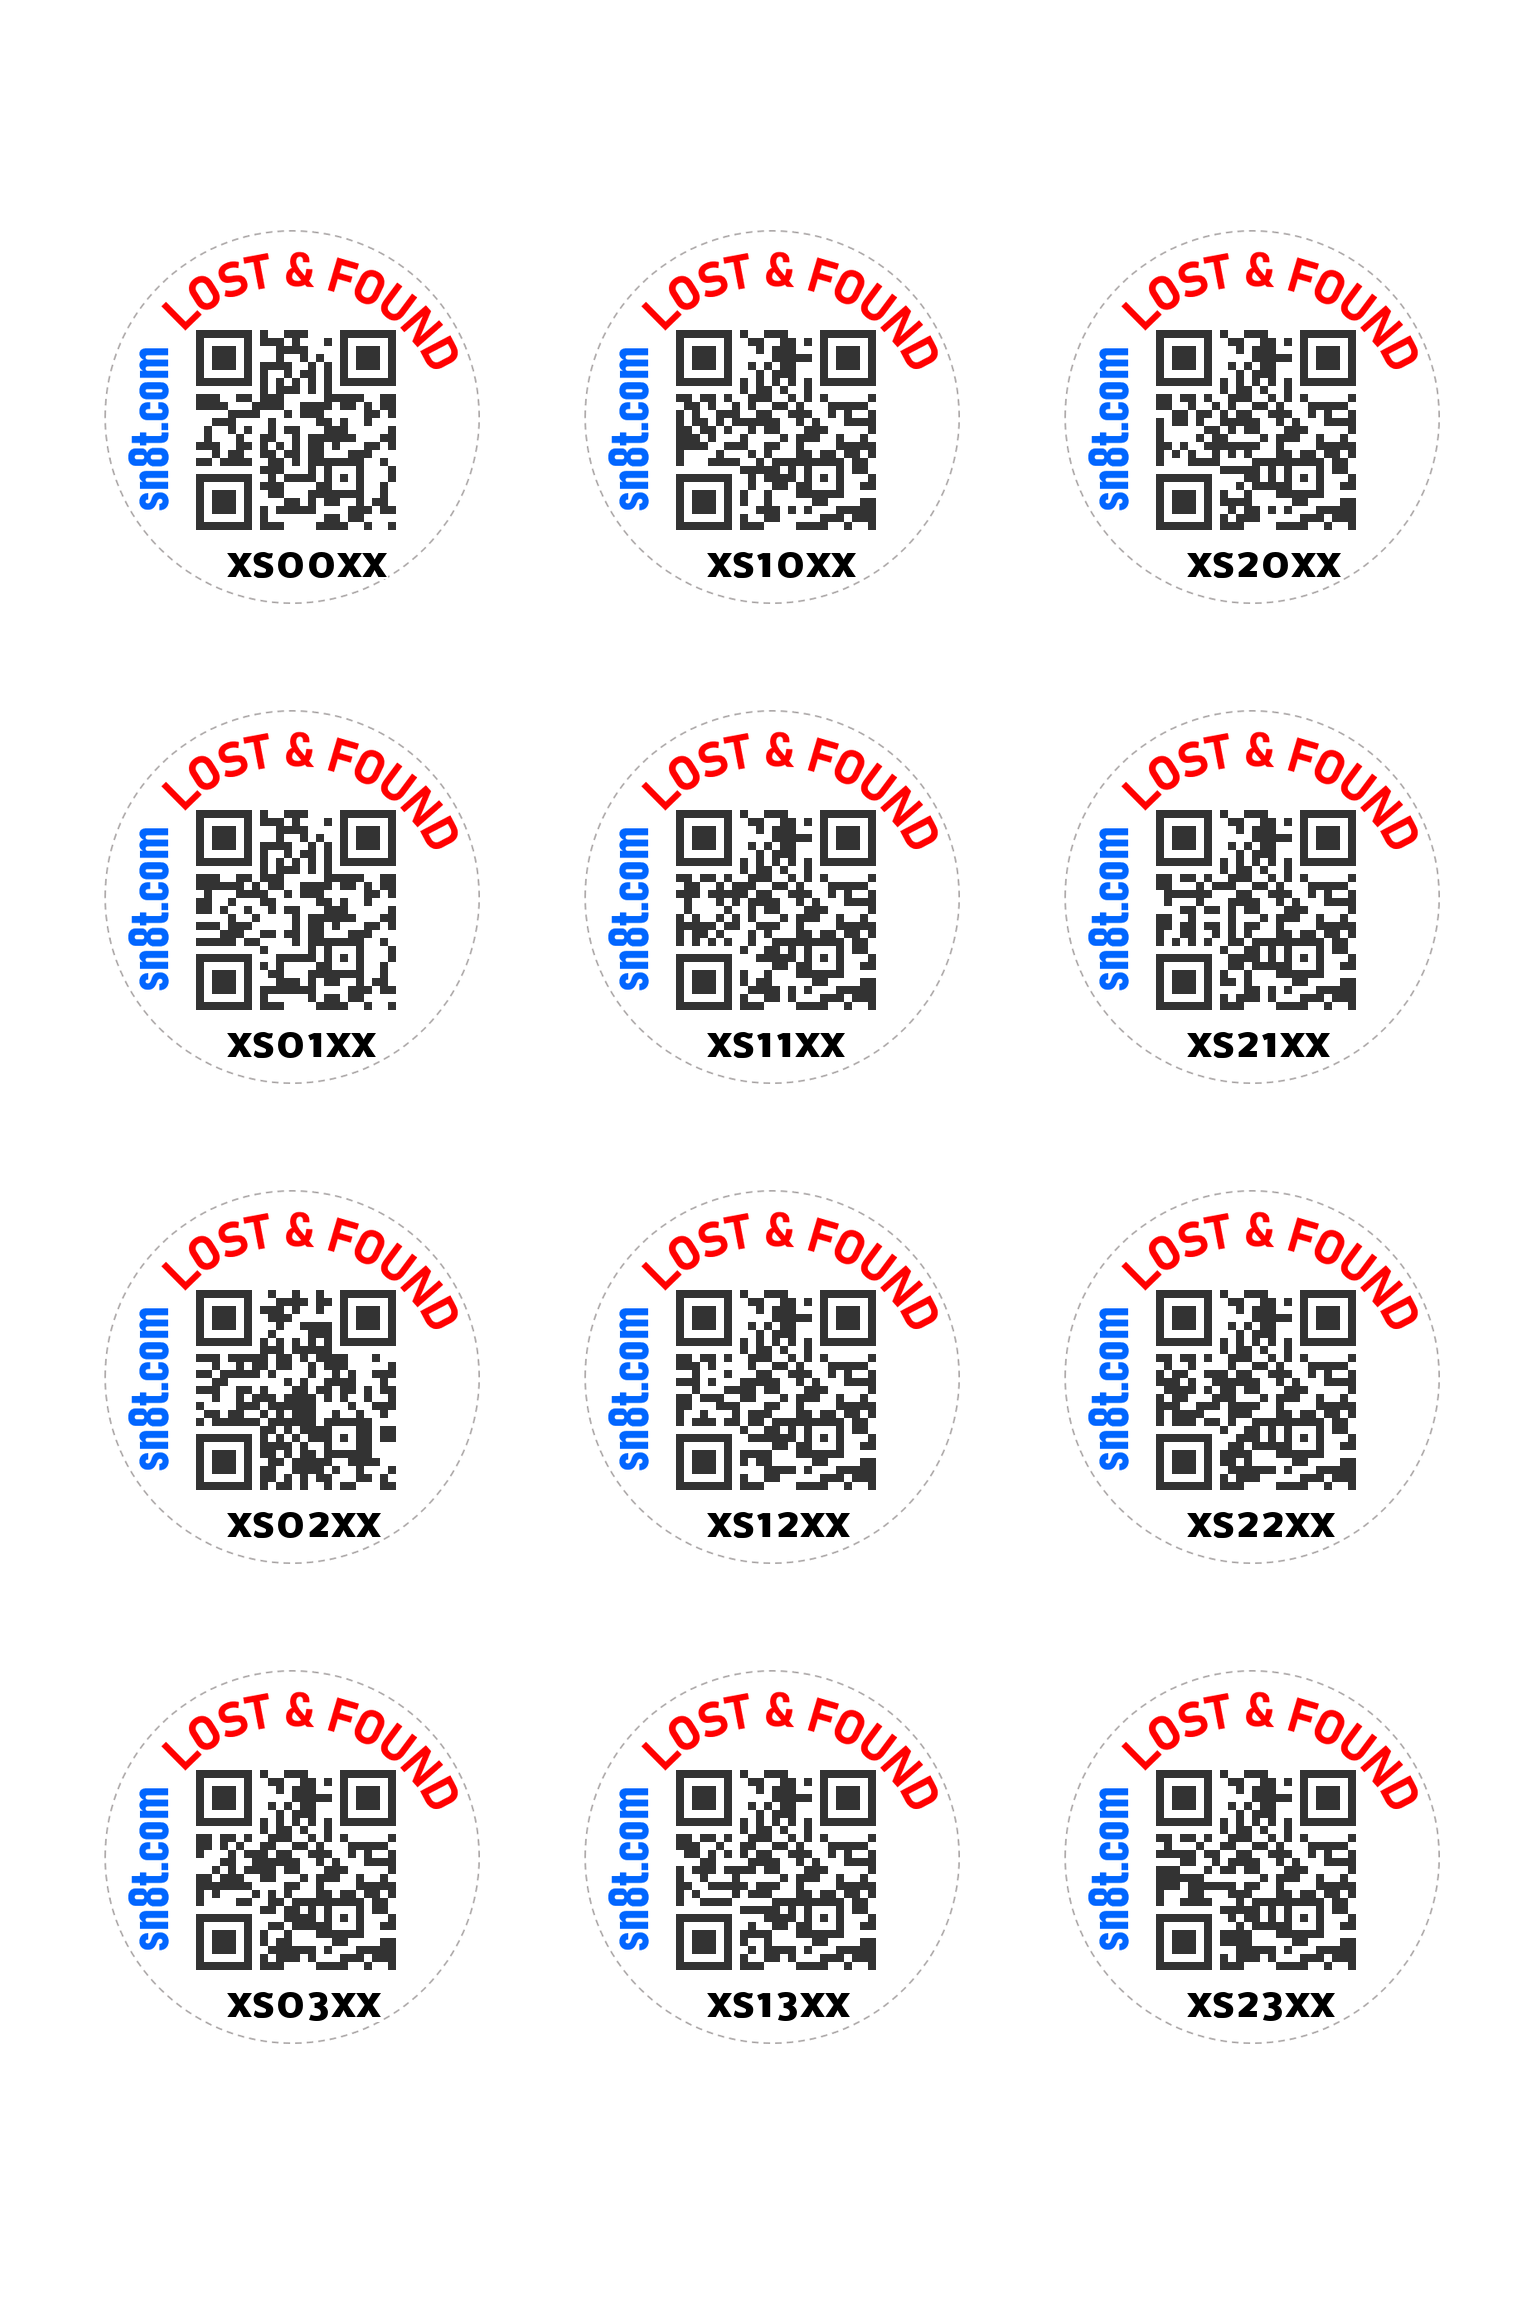

In [163]:
INCH = 96*4
QINCH = 96
paper = Image.new("RGBA",(INCH*4,INCH*6),'white')

for iy in range(4):
    for ix in range(3):
        code = f'xs{ix}{iy}xx'
        circle = getCircleWithCode(code)
        paper.paste(circle,(QINCH+(INCH+QINCH)*ix,round(.6*INCH) + iy*(INCH+QINCH)))
        

display(paper)


# display(circle)